In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                
    # return list of sparsity            
    return sparsity_list

In [4]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [5]:
def all_plotter(sorted_test_acc_list, sorted_sparsity_list, sorted_selectivity_average_list, nonsorted_test_acc_list, nonsorted_sparsity_list, nonsorted_selectivity_average_list, location='best'):
    fig, ax = plt.subplots(figsize=(20, 15))
    
    ax.plot(np.linspace(0.0, 100.0, num=100), sorted_test_acc_list, label='sorted test accuracy', c='royalblue')
    ax.plot(np.linspace(0.0, 100.0, num=100), sorted_sparsity_list, label='sorted sparsity', c='cornflowerblue')
    ax.plot(np.linspace(0.0, 100.0, num=100), sorted_selectivity_average_list, label='sorted selectivity', c='lightsteelblue')
    
    ax.plot(np.linspace(0.0, 100.0, num=100), nonsorted_test_acc_list, label='original test accuracy', c='indigo')
    ax.plot(np.linspace(0.0, 100.0, num=100), nonsorted_sparsity_list, label='original sparsity', c='darkorchid')
    ax.plot(np.linspace(0.0, 100.0, num=100), nonsorted_selectivity_average_list, label='original selectivity', c='violet')

    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

# Graph format

In [6]:
def plotter(optimizer_name, flag=False):
    sorted_test_vals  = test_val_extractor(f'sorted_selectivity_{optimizer_name}.txt')
    sorted_sparsities = sparsity_val_extractor(f'sorted_sparsity_{optimizer_name}.txt')
    sorted_selectivity_average, sorted_selectivity_std = selectivity_val_extractor(f"sorted_selectivity_{optimizer_name}.txt")

    non_sorted_test_vals  = test_val_extractor(f'not_sorted_selectivity_{optimizer_name}.txt')
    non_sorted_sparsities = sparsity_val_extractor(f'not_sorted_sparsity_{optimizer_name}.txt')
    non_sorted_selectivity_average, non_sorted_selectivity_std = selectivity_val_extractor(f"not_sorted_selectivity_{optimizer_name}.txt")
    
    if flag==False:
        all_plotter(sorted_test_vals, sorted_sparsities, sorted_selectivity_average, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average)
    else:
        return sorted_test_vals, sorted_sparsities, sorted_selectivity_average, sorted_selectivity_std, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average, non_sorted_selectivity_std 

In [7]:
def compare(optimizer_name, flag=True):
    print(f'\n==============={optimizer_name}===============')
    sorted_test_vals, sorted_sparsities, sorted_selectivity_average, sorted_selectivity_std, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average, non_sorted_selectivity_std = plotter(optimizer_name, flag=True)
    print(f"{optimizer_name} non_sorted(original): Test acc={non_sorted_test_vals[-1]:.3f}, Spar={non_sorted_sparsities[-1]:.3f}, Selec avg={non_sorted_selectivity_average[-1]:.3f}, Selec std={non_sorted_selectivity_std[-1]:.3f}")
    print(f"{optimizer_name} sorted: Test acc={sorted_test_vals[-1]:.3f}, Spar={sorted_sparsities[-1]:.3f}, Selec avg={sorted_selectivity_average[-1]:.3f}, Selec std={sorted_selectivity_std[-1]:.3f}")
    print()
    print("test deviation: sorted - non_sorted(original):", sorted_test_vals[-1] - non_sorted_test_vals[-1])
    print("sparsity deviation: sorted - non_sorted(original):", sorted_sparsities[-1] - non_sorted_sparsities[-1])
    print("selectivity deviation: sorted - non_sorted(original):", sorted_selectivity_average[-1] - non_sorted_selectivity_average[-1])
    print()
    print("test % difference: sorted / non_sorted(original):", (sorted_test_vals[-1] / non_sorted_test_vals[-1]) * 100)
    print("sparsity % difference: sorted / non_sorted(original):", (sorted_sparsities[-1] / non_sorted_sparsities[-1]) * 100)
    print("selectivity % difference: sorted / non_sorted(original):", (sorted_selectivity_average[-1] / non_sorted_selectivity_average[-1]) * 100)


In [8]:
# 100 epochs

compare('SGD')
# compare('Adadelta')
compare('Adagrad')
compare('Adam')


===============SGD===============
SGD non_sorted(original): Test acc=0.980, Spar=0.266, Selec avg=0.345, Selec std=0.161
SGD sorted: Test acc=0.619, Spar=0.350, Selec avg=0.442, Selec std=0.144

test deviation: sorted - non_sorted(original): -0.36119999999999997
sparsity deviation: sorted - non_sorted(original): 0.08410000000000001
selectivity deviation: sorted - non_sorted(original): 0.09695238403869344

test % difference: sorted / non_sorted(original): 63.150377473984896
sparsity % difference: sorted / non_sorted(original): 131.66415662650604
selectivity % difference: sorted / non_sorted(original): 128.09386900072516

===============Adagrad===============
Adagrad non_sorted(original): Test acc=0.980, Spar=0.621, Selec avg=0.694, Selec std=0.183
Adagrad sorted: Test acc=0.867, Spar=0.268, Selec avg=0.356, Selec std=0.290

test deviation: sorted - non_sorted(original): -0.11210000000000009
sparsity deviation: sorted - non_sorted(original): -0.3525
selectivity deviation: sorted - non_s

# SGD

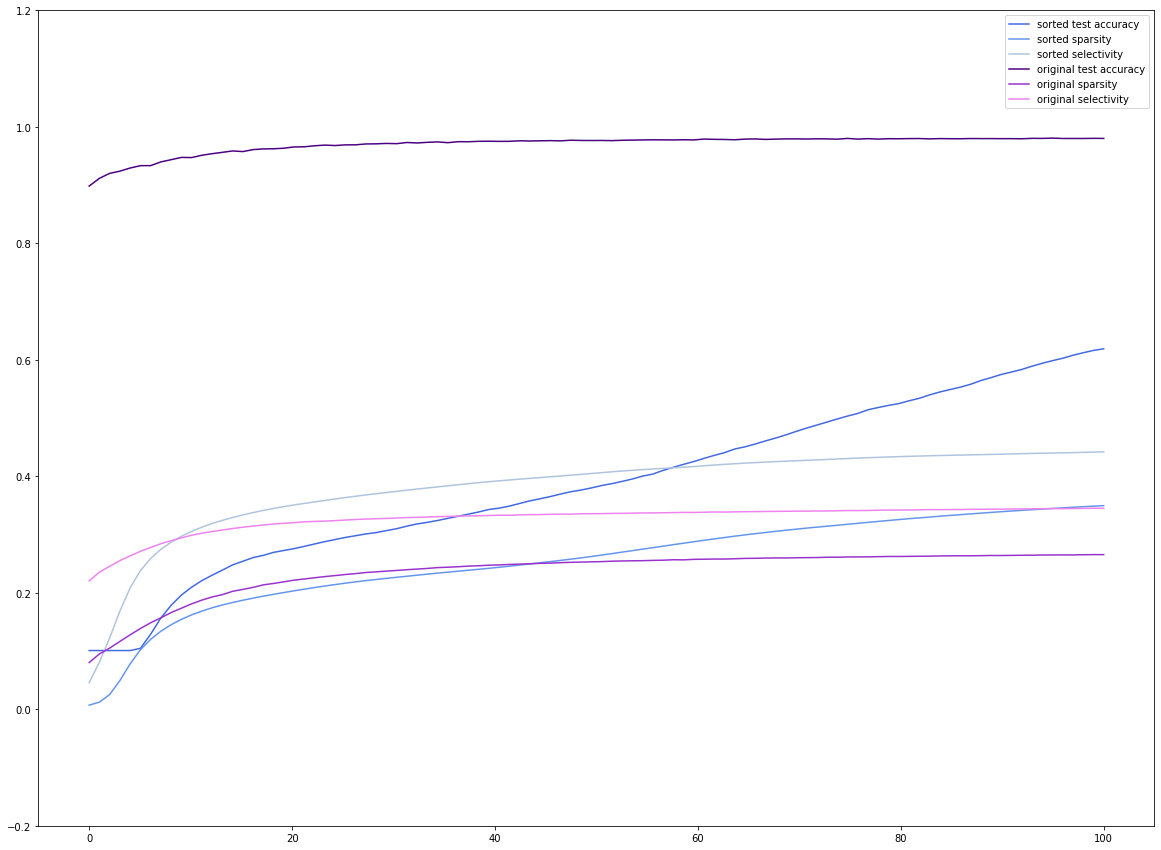

In [9]:
plotter('SGD')

# Adagard

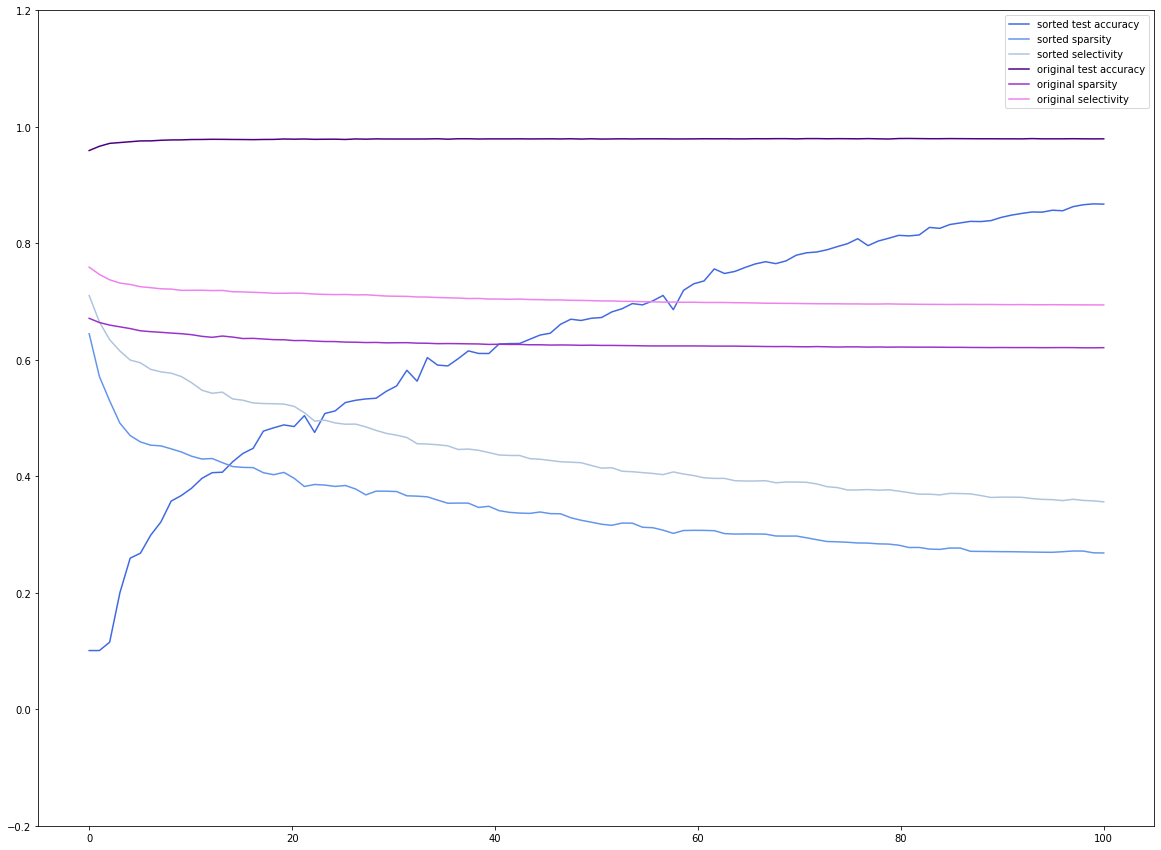

In [10]:
plotter('Adagrad')

# Adam

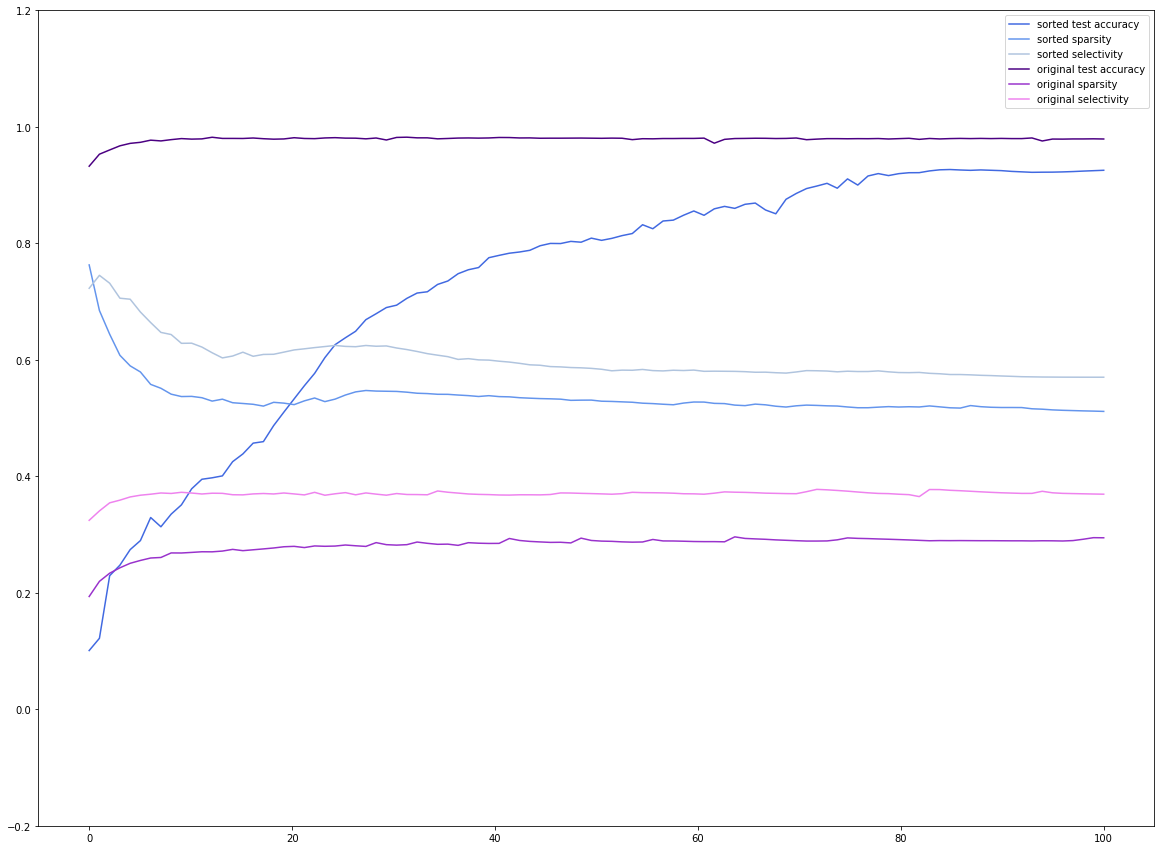

In [11]:
plotter('Adam')